# Chapter 08b: Poisson processes side notes

In [1]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf
from scipy.stats import gamma, poisson
import seaborn as sns

# Intuitions and goals
In this chapter we will deal with Poisson processes and Exponential distributions and use a couple of matches of the FIFA World Cup to make estimations

# France VS Croatia
The final target for this exercise is to get a middle ground between the 1.4 goals per match historically in the Fifa World Cup and the final score of the match (4-2) to determine how good is one team vs the other and predict a rematch.

## Process
### Initial
* We define the goals in a match per team as a random variable: $\boldsymbol{X}$
* It can be modeled by a Poisson distribution that takes a parameter $\theta$ that we don't know:
$\boldsymbol{X}\sim\mathrm{Poisson}(\theta)$
* This $\theta$ can be approximated as the posterior distribution of some prior belief $G$ given some $P$ observations:
$\theta\sim L(G|P)$
* The prior belief $G$ is a gamma distribution over the interval $[0, 10]$  that averages the all time score rate: $1.4$.
$G=\mathrm{Gamma}(\alpha=1.4)$
* The observation $P$ is a Poisson distribution of France scoring 4 goals.
* We repeat the process for Croatia scoring two goals.

### Telling superiority
* With above, we have a probability distribution of the **goal rate** (that is what $\theta$ represents) per team so we get the cartesian product of all possible pairs and check which team has the greater one for each of the pairs. This will give us how superior France is as we are using the **goal-rate as a proxy for superiority.**
$$
\text{Goal-Rate comparison}
 \begin{bmatrix}
  F_0-C_0 & F_0-C_1 & \cdots & F_0-C_j \\
  F_1-C_0 & F_1-C_1 & \cdots & F_1-C_j \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  F_i-C_0 & F_i-C_1 & \cdots & F_i-C_j \\
 \end{bmatrix}
$$
* With above we can measure France's superiority by counting the positive entries, Croatia's superiority by counting negative ones and ties by counting $0$s

$$
\text{Superiority} =
  \begin{cases}
    \text{France} = \sum_i^n\sum_j^n 1/n       & \quad \text{if } F_{ij}-C_{ij} > 0 \\
    \text{Croatia} = \sum_i^n\sum_j^n 1/n       & \quad \text{if } F_{ij}-C_{ij} < 0 \\
    \text{Tie} = \sum_i^n\sum_j^n 1/n       & \quad \text{if } F_{ij}-C_{ij} = 0 \\
  \end{cases}
$$

### Predicting a rematch
* Since $\theta$ is a distribution instead of a scalar we want to build a matrix of values of Poisson distributions for each value in the interval $[0, 10]$ and get weighted average of the rows where the weight is determined by $\theta$:
$$
    \begin{matrix} \mathrm{Poisson}(x_0)\cdot\theta_0\\
    \mathrm{Poisson}(x_1)\cdot\theta_1\\
    \vdots\\
    \mathrm{Poisson}(x_n)\cdot\theta_n\\
    \end{matrix}
$$
* And more generaly:
$$\boldsymbol{X}\sim\sum_{i=0}^n\mathrm{Poisson}(x_i)\cdot\theta_i$$
* Repeat the process for both teams:
$$\boldsymbol{X}_F\sim\sum_{i=0}^n\mathrm{Poisson}(x_i)\cdot\theta_{F_i}$$
$$\boldsymbol{X}_C\sim\sum_{i=0}^n\mathrm{Poisson}(x_i)\cdot\theta_{C_i}$$
* With above, we have a probability distribution of goals per team so we get the cartesian product of all possible pairs that represents a possible outcomes for a match and calculate the joint probability of such an outcome to happen:
$$
\text{Outcomes}
 \begin{bmatrix}
  F_0\cdot C_0 & F_0\cdot C_1 & \cdots & F_0\cdot C_{10} \\
  F_1\cdot C_0 & F_1\cdot C_1 & \cdots & F_1\cdot C_{10} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  F_{10}\cdot C_0 & F_{10}\cdot C_1 & \cdots & F_{10}\cdot C_{10} \\
 \end{bmatrix}
 $$
 * Finally we can sum the probabilities when France wins ($\sum F_n\cdot C_{m<n}$), when Croatia wins ($\sum F_n\cdot C_{m>n}$) and when there's a tie ($\sum F_n\cdot C_n$) to predict the rematch.

## Sources of uncertainty
There are two sources of uncertainty:
* The probability of scoring $n$ goals in a match, $\boldsymbol{X}$
* The parameter $\theta$ that might model above probability

## Delving into Poisson Distribution
### Poisson breakdown

The Poisson distribution can be represented

$$\frac{\lambda^k\cdot e^{-\lambda}}{k!}$$

Let's analyze it assuming $\lambda=2$
**Numerator:**  The numerator is under 1 in the interval $[0, 2.885\approx\log_2(\frac{1}{e^{-2}})=\log_2(e^2)]$
**Denominator:** it's under 1 in the interval $[0, 1]$ and always bigger than the numerator for any $x$

The ratio between both quantities $\lambda^k\cdot e^{-\lambda}$ and $k!$ peaks at 1.5 but then $k!$ skyrockets (even steeper than the exponential $\lambda^k$) making that ratio be more and more small and therefore the probability more unlike.


https://www.desmos.com/calculator/tp1wbhlttd

### Poisson pmf flavours
We can create two kinds pmfs when it comes to Poisson distribution on scipy:
* Create a poisson pmf for a range of values for lambda and a fixed number of goals. That is, get the **likelihood** of scoring $n$ goals as a function of our average goals per unit time. We will use this format when estimating the posterior value of $\lambda$
* Create a poisson pmf for a fixed value of lambda and a range of goals. That is, get the **probability** of scoring $m$ to $n$ goals given our average goals per unit time. We will use this to predict the rematch

In [2]:
goals = np.arange(10)
lambdas = np.linspace(0, 10, 100)

# Probability of scoring 5 goals for diferents goal rates.
five_goals_per_lambda = poisson(lambdas).pmf(5),

# Probability of scoring n goals when we average 2 goals per match
goals_when_scoring_two_on_average = poisson(2).pmf(goals),

### Poisson sensitivity
It seems that Poisson distribution is quite sensible to the arguments passed through. For instance if our call center processes 180 calls per hour the probability of having 240 is $3.041x10^{-6}$. Whereas if we plug that number in minutes the probability is $\approx 0.168$

In [3]:
(
    poisson(180).pmf(240),  # having 240 calls/h when we average 180
    poisson(3).pmf(4)  # having 4 calls/minute when we average 3
)

(3.0410655158416314e-06, 0.16803135574154085)

## Crunch the numbers
### Calculate $\theta$ for France

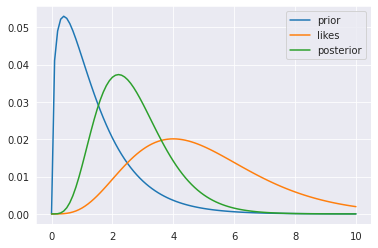

In [4]:
# Generate 100 valuues evenly distributed between 0 and 10 that will represent all
# possible values for lambda
lambda_values = np.linspace(0, 10, 101)

# Create a gamma distribution that averages the 1.4 goals per match over above possible
# values for lambda
prior = gamma.pdf(lambda_values, 1.4)

# As the prior probability sums more than 1 we might want to normalize it.
assert prior.sum() > 1
prior /= prior.sum()
assert prior.sum() == 1

# Calculate the likelihood for France. As we know that France scored 4, we can compute the
# poisson distribution for that value of lambda. This, in plain english, is the
# probability that frace scores 4 goals for every lambda value in the lambda values.
fr_likes = poisson(lambda_values).pmf(4)
fr_prior = prior.copy()

# Finally get the posterior for France
theta_f = fr_prior * fr_likes / (fr_prior * fr_likes).sum()

# Plot the relevant distributions
sns.lineplot(x=lambda_values, y=prior, color='C0', label='prior');
sns.lineplot(x=lambda_values, y=fr_likes / fr_likes.sum(), color='C1', label='likes');
sns.lineplot(x=lambda_values, y=theta_f, color='C2', label='posterior');

### Calculate $\theta$ for Croatia

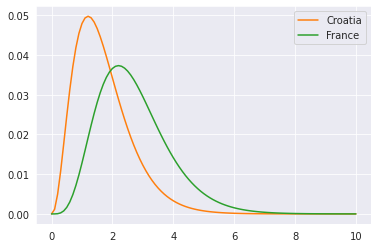

In [5]:
# let's do the same for Croatia
cr_likes = poisson(lambda_values).pmf(2)
cr_prior = prior.copy()

theta_c = cr_prior * cr_likes / (cr_prior * cr_likes).sum()

sns.lineplot(x=lambda_values, y=theta_c, color='C1', label='Croatia');
sns.lineplot(x=lambda_values, y=theta_f, color='C2', label='France');

### Calculate the MAP for both teams

In [6]:
print("Posterior average number of goals (MAP)")
print("France:", theta_f.argmax() / 10)
print("Croatia:", theta_c.argmax() / 10)

Posterior average number of goals (MAP)
France: 2.2
Croatia: 1.2


So it seems that France is better team but how much?

### Evaluate cedible intervals for the distributions

In [7]:
def find_quantile(distribution, prob):
    """Get the index where the cdf overcomes the prob in the distribution."""
    assert prob >= 0 and prob <= 1
    quantile = distribution[distribution.cumsum() > prob][0]
    return np.where(distribution == quantile)[0][0]

fr_quantiles = [find_quantile(theta_f, p) for p in (.05, .95)]
cr_quantiles = [find_quantile(theta_c, p) for p in (.05, .95)]
print(
    "90% credible intervals. Fr:",
    lambda_values[fr_quantiles], '; Cr:', lambda_values[cr_quantiles]
)

90% credible intervals. Fr: [1.1 4.8] ; Cr: [0.5 3.4]


It turns out that the 90% of the probabilty of France is between 1.1 and 4.8 goals on average whereas for Croatia is .5 and 3.4. But this does not tell us much more so we are better off getting all possible combinations of lambda values and get the probability of each one happening.

### $\theta$ as a proxy for superiority
Since $\theta$ represents the distribution for $\lambda$ values we can use them as a proxy for superiority.

In [8]:
# Create every possible pair of lambda values to measure in which France is superior.
xv, yv = np.meshgrid(lambda_values, lambda_values, sparse=True)
match_final_score = xv - yv

# And calculate their joint probability
xv, yv = np.meshgrid(theta_f, theta_c, sparse=True)
p_score = xv * yv

# let's assume that positive values are France wins
fr_wins = p_score[match_final_score > 0].sum()
cr_wins = p_score[match_final_score < 0].sum()
draw = p_score[match_final_score == 0].sum()
print(f'France has a superior lambda in the  {fr_wins:.1%} of the total elements')
print(f'Croatia has a superior lambda in the  {cr_wins:.1%} of the total elements')
print(f'There\'s a draw in {draw:.1%} of the total elements')

France has a superior lambda in the  75.0% of the total elements
Croatia has a superior lambda in the  22.7% of the total elements
There's a draw in 2.3% of the total elements


### Predicting the rematch
We don't know the $\lambda$ for each team that will tell us the probability of each goal per team. Rather, we have a posterior distribution for that value. We can approach this problem by:
* Creating a bunch of poisson distributions with values for $\lambda$ ranging from 0 to 10 evenly distributed in 100 bins and for goals ranging from 0 to 10 as well. This will effectively create a matrix of 101 rows, one for each value of $\lambda$, and 10 columns, one for each goal
* Give weights to each of the rows using the posterior
* Get the sum per goal over the weighted rows

(0.5654797036811041, 0.22726992136879706, 0.1647422854338828)

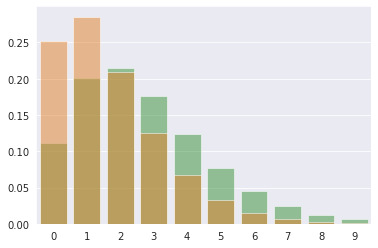

In [9]:
goals = np.arange(10)
outcomes = np.array([poisson(v).pmf(goals) for v in lambda_values])
assert outcomes.shape == (101, 10)  # a 101x10 matrix

# When creating the outcomes we implicitly assume that every value of lambda is equally
# probable but that's not true as France is more likely to have a value of 2.2 and Croatia
# 1.2 so we need a weighted array.
france_weighted = theta_f * outcomes.T
croatia_weighted = theta_c * outcomes.T

# Now that we have weighted lambdas, we can sum over lambda values to get a mixture of
# probabilities to score certain amount of goals.
france_score_probability = france_weighted.sum(axis=1)
croatia_score_probability = croatia_weighted.sum(axis=1)

sns.barplot(x=goals, y=france_score_probability, color='C2', label='France', alpha=.5);
sns.barplot(x=goals, y=croatia_score_probability, color='C1', label='Croatia', alpha=.5);

# Now we can do pretty much the same we did for the lambdas, get every possible match
# outcome and calculate the joint probability of that outcome
xv, yv = np.meshgrid(france_score_probability, croatia_score_probability)
joint_probability = xv * yv
assert joint_probability.shape == (10, 10)  # 10x10 matrix

xv, yv = np.meshgrid(goals, goals)
match_outcome = xv - yv

fr_wins = joint_probability[match_outcome > 0]
cr_wis = joint_probability[match_outcome < 0]
ties = joint_probability[match_outcome == 0]
fr_wins.sum(), cr_wins.sum(), ties.sum()

# Germany VS Brazil
>In the 2014 FIFA World Cup, Germany played Brazil in a semifinal match. Germany scored after 11 minutes and again at the 23 minute mark. At that point in the match, how many goals would you expect Germany to score after 90 minutes? What was the probability that they would score 5 more goals (as, in fact, they did)?

The final target for this exercise is to get a middle ground between the 1.4 goals per match (kind of a goal every .71 matches) and Germany scoring every 11.5' (a goal every .12 matches) for the two first goals.

## Process
### Initial
* We define the time between goals as a random variable $\boldsymbol{X}$
* It can be modeled by an exponential distribution that takes a parameter $\theta$ that we don't know:
$\boldsymbol{X}\sim\mathrm{Exp}(\theta)$
* This $\theta$ can be approximated as the posterior distribution of some prior belief:
$\theta\sim L(G|E)$
* The prior belief is a gamma distribution over the interval $[0, 10]$  that averages the all time score rate: $1.4$.
$G=\mathrm{Gamma}(\alpha=1.4)$
* The observations are exponential distributions of Germany scoring after 11' and then after 12'. $E=\mathrm{Exp}(11/90)\cdot\mathrm{Exp}(12/90)$
* At this point we have a matrix of values as we have an exponential distribution for each value in the interval $[0, 10]$ so we will get the weighted average of the rows where the weight is determined by $\theta$:
$$
    \begin{matrix}\mathrm{Exp}(x_0)\cdot\theta_0\\
    \mathrm{Exp}(x_1)\cdot\theta_1\\
    \vdots\\
    \mathrm{Exp}(x_n)\cdot\theta_n\\
    \end{matrix}
$$
* And more generaly:
$$\boldsymbol{X}\sim\sum_{i=0}^{n}\mathrm{Exp}(x_i)\cdot\theta_i$$

## Sources of uncertainty:
There are two sources of uncertainty:
* The probability of scoring in the next $t$ minutes, $\boldsymbol{X}$
* The parameter $\theta$ that might model above probability

## Delving into Exponential distribution
We will use the exponential distribution as a proxy of the probability of scoring in the following $t$ minutes given that we average one goal every $\lambda$ minutes. As [wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution) says:

> In probability theory and statistics, the exponential distribution is the probability distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate.

### Wait, $\lambda$ again?
Yes, but be careful as: **In the exponential distribution you plug rate $\lambda$ to get time between events** whereas in the Poisson distribution you plug rate $\lambda$ to get number of goals.

$$
\text{If }\boldsymbol{X}\sim \mathrm{Exp}(\lambda)\hspace{3em}
\text{Then }E[\boldsymbol{X}]=\frac{1}{\lambda}
$$

That in plain english is: if the time between events $\boldsymbol{X}$ can be modeled by an exponential distribution $\mathrm{Exp}$ that depends on the event rate $\lambda$, then the expected value $E[\boldsymbol{X}]$ for that distribution is the inverse of that event rate $\frac{1}{\lambda}$ (which effectively is a time)

$$
\text{Rate }: \frac{\text{events}}{\text{time}}\hspace{3em}
\text{Time }: \frac{\text{time}}{\text{event}}
$$
[More information](https://towardsdatascience.com/what-is-exponential-distribution-7bdd08590e2a)

### Exponential Distributions pmf flavours
As happened with the poisson distribution, we can build exponential distributions in two ways:
* Given a fixed goal-rate $\lambda$, calculate the **probability** of scoring after $t$ time units, where that time could be scalar or a vector.
* Given a range goal-rates $\lambda$, estimate the **likelihood** of scoring after $t$ time units.

### Additional discoveries
The expected value for the prior is highly dependent on the range of values you select and slightly modified by the length of the range. Therefore, `np.linspace(0, 10, 101)` returns the `1.41` on average whereas `np.linspace(0, 4, 600)` returns `1.25`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy-stats-gamma
From `scipy.stats.gamma`, it turns out that gamma distributions are sometimes defined with two parameters $\alpha$ and $\beta$, to simulate $\beta$ in the constructor one adds `scale=1/beta`

## Crunch the numbers

The mean of the prior is 1.4140818156118378


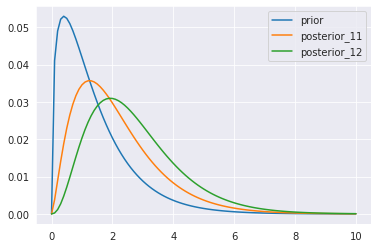

In [10]:
def exp_dist(t, lam):
    """
    Compute the exponential distribution for a given event-rate lambda.

    Usually t is a vector of values, but it can be computed for a single value.
    """
    return lam * np.exp(-(lam * t))

# Define lambda values
lambda_values = np.linspace(0, 10, 101)  # where integers represent matches

# Create a prior for the goal rate
prior = pd.Series(gamma(1.4).pdf(lambda_values), index=lambda_values)
prior /= prior.sum()
prior_mean = np.sum(prior.index * prior)
print(f"The mean of the prior is {prior_mean}")

# Get the likelihood,
# Scoring in the 11th min of the 1st match.
# If we scored in the 2nd match that would be (11+90 / 90)
minute = 11 / 90
germany_likes = exp_dist(minute, lambda_values)

# Let's get the posterior
theta_11 = prior.copy()
theta_11 *= germany_likes
theta_11 /= theta_11.sum()

# update the posterior with the evidence of Germany scoring after 12 mins (in the
# 23rd minute of the 1st match)
minute = 12 / 90
theta = theta_11 * germany_likes
theta /= theta.sum()

# Plot posteriors
sns.lineplot(x=lambda_values, y=prior, label='prior');
sns.lineplot(x=lambda_values, y=theta_11, label='posterior_11');
sns.lineplot(x=lambda_values, y=theta, label='posterior_12');

### Predicting the goals Germany scores
We have a distribution of values $\theta$ for the goal-rate $\lambda$ regarding the observation that Germany scored after 11' and then after 12'.
So pretty much like we did for France exercise, we can use that $\theta$ to build a Poisson distribution that will tell us the expected goals and the probabilities of scoring $n$ or more than $n$ goals.
In this case there's a caveat, though, since lambda refers to events per time unit, namely, goals per match, but we don't have a full match but rather a fraction of it so we have to reduce the lambda value by the fraction.


The expected goals for the next 67' are: 2.01
The probability of Germany scoring 5 goals is: 0.0475
The probability of Germany scoring more than 5 goals is: 0.0937


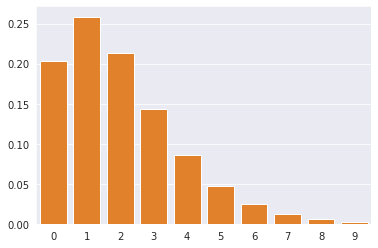

In [11]:
# we will use a shrunk version of lambda_values for the matrix of Poissons as we don't
# have a full match
lambda_values = np.linspace(0, 10, 101) * 67/90
goals = np.arange(10)  # redefine for the sake of explicitly
poisson_matrix = pd.DataFrame(
    [poisson(lam).pmf(goals) for lam in lambda_values], index=lambda_values
)

# Weight every row by theta factor and sum to get the final poisson-like distribution
goals_distribution = (poisson_matrix.T * theta.values).sum(axis=1)
sns.barplot(x=goals_distribution.index, y=goals_distribution.values, color="C1");

# Print some stats
expected = np.sum(goals_distribution.index * goals_distribution.values).round(2)
five = goals_distribution[5].round(4)
ge_5 = goals_distribution[goals_distribution.index > 4].sum().round(4)
print(f"The expected goals for the next 67' are: {expected}")
print(f"The probability of Germany scoring 5 goals is: {five}")
print(f"The probability of Germany scoring more than 5 goals is: {ge_5}")

### Predicting the goals Germany scores (alternative --flawed-- approach)
We could address this problem in this way:
* If we know the expected time between goals we can compute how many goals we can score in the remaining time, 67'
* We can know the expected time between goals by building an exponential-like distribution in a similar way as we built the Poisson-like distribution in the other approach

However this carries a couple of downsides, namely:
* The outcome is highly sensitive to the range of waiting times and the range of lambdas. That is something that we appreciate in the other approach, so it might be worth checking which one shows more sensitivity --understand less stable-- to those ranges. This feature makes the process of selecting the ranges a very crucial part.
* The fact that exponential distributions carry most of their probability in the beginning makes getting the 5 or more goals way more probable than in the previous approach which is confusing.

In the next section there's an investigation about this flawed approach and how the numbers mismatch

We expect a goal every 33 minutes.
The expected goals for the next 67' are: 2.0459930047393216
The probability of Germany scoring 5 goals is: 0.02579862684789169
The probability of Germany scoring more than 5 goals is: 0.32902108259167884


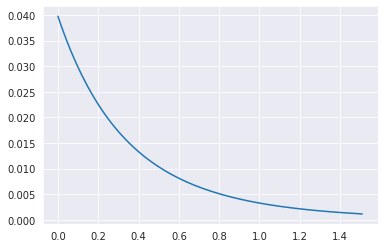

In [12]:
# Build a 101x101 matrix where columns represent waiting time for next goal, whereas rows
# represent the lambda parameter.
waiting_time = np.linspace(0, 1.51, 101)  # where integers mean whole matches, 90'
lambda_values = np.linspace(1, 10, 101)* 67/90
all_exp = pd.DataFrame(
    [exp_dist(waiting_time, lam) for lam in lambda_values], index=lambda_values
)

# Weight each of the distributions by theta factor: sum all the waiting times'
# probabilities and reduce them by theta.
X = (all_exp.T * theta.values).sum(axis=1)
X /= X.sum()  # Normalize

# Remember that X is an exponential-like distribution whose parameter is in turn another
# distribution, theta, so the index are the waiting times whereas the values are their
# probabilities.
X.index = waiting_time
sns.lineplot(x=waiting_time, y=X);

# To know how many goals we should expect in the next 67' we need the expected value of X
expected_t = np.sum(X.index * X.values)  # time in matches, ~.56
expected_goals = 67 / (90 * expected_t)
# Germany finally scored 5 more goals which is a goal every 13.4' let's compute the
# probability of less than that amount
ge_5 = X[X.index <= 13.4/90].sum()
five = X[
    X.index[np.abs(X.index - 13.4/90).argmin()]  # The closest index to 13.4/90
]
print(f"We expect a goal every {round(expected_t*90)} minutes.")
print(f"The expected goals for the next 67' are: {expected_goals}")
print(f"The probability of Germany scoring 5 goals is: {five}")
print(f"The probability of Germany scoring more than 5 goals is: {ge_5}")

# Poisson vs Exponential (apparently mismatch)

[Probably worth picking up at a later point]

I like to think that Poisson and Exponential distributions are both sides of the same coin as in one you have events per time and the other tells you time between events.

Following https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution I see that $P(\boldsymbol{X}\le x)= 1- e^{-\lambda x}$ that means that the probability of your waiting time being less than a given amount of time $x$ follows the cdf of an exponential distribution. Which is equivalent to say that the probability of the number of events being constant decays exponentially $P(N_{t+x}-N_t=0)=e^{-\lambda x}$

However this is my reasoning:
If we have a $\mathrm{Poisson}(\lambda=3)$ this tells us the probability of getting $n$ events when we average 3 events per unit time (say days, from now on). On the other hand $\mathrm{Exponential}(\lambda=3)$ will tell us the probability of waiting more than $x$ days when you average the same three events per day.

Above works well when your waiting time is more than 1, that is, you have to wait for more than one day to see an event and therefore your events per day are 0 as:
$$
\frac{3^0\cdot e^{-3}}{0!}=1 - (1-e^{-3\cdot1})
$$

One might argue, though, that if your waiting time is, say, 1.5 you have no events the first day and one the second and here is where the problems come in because that probability does not live in the 0 bar of the Poisson distribution but in the 1 which makes above being false.

Having 3 events per day, means that your waiting time between events is 1/3. More generally, if your waiting time is:
* 1/3 days, then you have the first day 3 events, and the second another 3 events
* 1/4 days, then you have the first day 4 events, and the second another 4 events
* 11/60 days (in the middle of 1/5 and 1/6), then you have events following this pattern:
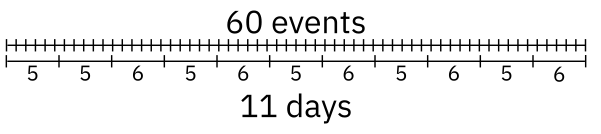
* 2/3 days, then you have the first day one event and two events the second.
* 2 days, then the first day you have 0 events and one the second.
* 5 days, then you have four days of 0 events and one event on the fifth

So far so good.

The probability of getting more than 3 events/d according a Poisson distribution is:
$$
\sum_{n=4}^{\infty}\frac{3^n\cdot e^{-3}}{n!}
$$
Which seems to be bounded at $\approx .3527$
Likewise, the probability of getting two or three events is
$$
\frac{3^2\cdot e^{-3}}{2!}+\frac{3^3\cdot e^{-3}}{3!}\approx .4481
$$
Finally, the probability of getting zero or one event is:
$$
\frac{3^0\cdot e^{-3}}{0!}+\frac{3^1\cdot e^{-3}}{1!}\approx .1991
$$
As expected all above adds up to, almost, 1

![img](./assets/poisson-vs-exponential-nb.svg)

Given the relationship between events and waiting times, and assuming that we could normalize the exponential distribution and that the width of the bars in the poisson distribution is 1 , I would expect:
* the area in the interval $(0, \frac{1}{3})$ in the exponential distribution would be roughly equal to the area in the interval $[4, \infty]$ in the Poisson distribution.
* the area in the interval $[\frac{1}{3}, 1)$ in the exponential distribution would be roughly equal to the area in the interval $[2, 3]$ in the Poisson distribution
* the area in the interval $[1, \infty)$ in the exponential distribution would be roughly equal to the area in the interval $[0, 1]$ in the Poisson distribution

As far as I understand, one can calculate those areas by means of the CDF of the exponential distribution, but there's an stark mismatch between this outcome and the one you get from the poisson distribution, as:
* $1-e^{-3\cdot1/3}\approx.6321$ (vs $.3527$)
* $(1-e^{-3\cdot1}) - (1-e^{-3\cdot1/3})\approx.3181$ (vs $.4481$)
* $1 - (1-e^{-3\cdot1})\approx.0498$ (vs $.1991$)

In [13]:
# One can do better than above with this but, it's a coincidence
pd.DataFrame({
    "range": [
        "(0, 1/3]", "(1/3, 1]", "(1, inf)"
    ],
    "poisson": [
        poisson(3).pmf(np.arange(3, 30)).sum(),
        poisson(3).pmf([1, 2]).sum(),
        poisson(3).pmf(0),
    ],
    "exponential": [
        1 - np.exp(-3 * 1/3),
        (1 - np.exp(-3 * 1)) - (1 - np.exp(-3 * 1/3)),
        np.exp(-3 * 1),
    ]
})


,range,poisson,exponential
0,"(0, 1/3]",0.576810,0.632121
1,"(1/3, 1]",0.373403,0.318092
2,"(1, inf)",0.049787,0.049787


## Flaw in the reasoning: memoryless
This seems the flaw of above reasoning: I'm assuming that if you have 1/2 days of waiting time, that matches 1:1 with 2 events per day, which is not true.

If you have 2 events per day there are a bunch of scenarios that produce that result, for instance, 1/3+2/3, 1/4+3/4, and so on. This is possible because of the memoryless property of the exponential distribution that says that at any point in your waiting time, no matter how long have you been waiting for, your probability of waiting any $x$ minutes more follows the same exponential model.

That's why 0 matches: because having no events in a day is exactly equal to wait for more than one day for the event, there's a 1:1 relationship.

Finally, if you have one event per day, that can be produced by the following waiting times: 1/3 + 3/3, 1/2 + 2/3, and, so on. Which is clear is that the first waiting time must be less than one.

Maybe one of the sources of confusion was that I was naming *time between events* when it's really the time between one event and the next, or because of the memoryless property the time between when you arrive and the next event happening.

# What if: prediction
What if we measure the prediction capacity?

**Process:**
* We start, say, at 1/3 of all the matches that have been played using their goal average to build the prior, then
* We take the last score for, say, France to calculate posterior
* We predict the next score for France ¿using the MAP?
* We measure the error from our prediction

**A few things to consider:**
* Probably the time lapse between matches matter, it's not the same predicting from match to match than from championship to championship
* The team France plays against plays a role in France's capacity to score, so probably we are better off picking only the matches against a fixed team.

# What if: historic Bayesian update
What if we start with a flat prior and update our belief using the matches France played?

**Naively assume that the goals scored are independent of the rival team**
the amount of goals scored will depend not only it the french capacity to score but also in the rival's capacity to be scored, so maybe we should later create a poisson distribution that reflects this fact and somehow use that information. But for the moment let's start low and rough.

In [14]:
df = pd.read_csv('../data/fifa_historic_scores.csv')
df.sample()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
937,1925-12-06,Brazil,Paraguay,5.0,2.0,Copa América,Buenos Aires,Argentina,True


## Syntetic vs real
Let's start taking a look at how a poisson process with $\lambda=1.81$ (France averaging score) differs from the actual distribution of goals among matches. We can see that the poisson process fits well to some extent and definitely they follow the same pattern: both peak at 1 and then exponentially decrease.

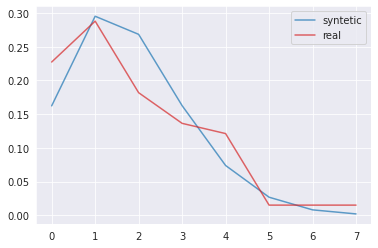

In [15]:
# FIFA World Cup
fwc = df[df.tournament == 'FIFA World Cup']

# france matches (66 in the fwc)
away = (fwc.away_team == 'France')
home = (fwc.home_team == 'France')
fr = fwc[ home | away ].copy()
fr['score'] = 0

# Get france's goals regardless home/away
fr.loc[fwc[away].index, 'score'] = fwc[away].away_score
fr.loc[fwc[home].index, 'score'] = fwc[home].home_score
fr['score'] = fr.score.astype(int)

# Compare the distribution of goals with a syntetic poisson
goals = np.arange(
    fr.score.min(),  # 0
    fr.score.max() + 1  # 7
)
lam = fr.score.mean()

syntetic = poisson(lam).pmf(goals)
real = Pmf.from_seq(fr.score)

sns.lineplot(x=goals, y=syntetic, label='syntetic', color='C0', alpha=.7);
sns.lineplot(x=goals, y=real, label='real', color='C3', alpha=.7);

And the cdf:

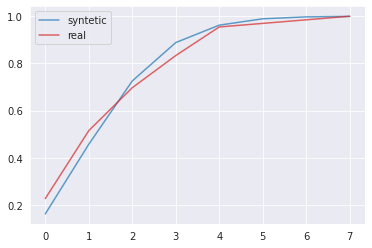

In [16]:
sns.lineplot(x=goals, y=syntetic.cumsum(), label='syntetic', color='C0', alpha=.7);
sns.lineplot(x=goals, y=real.cumsum(), label='real', color='C3', alpha=.7);

## Bayesian update for all France's matches

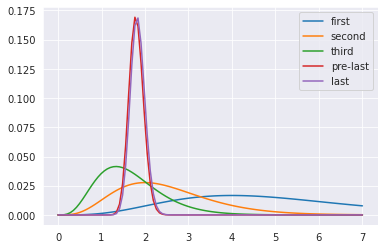

In [17]:
posteriors_tape = list()  # record the posteriors
goals = np.linspace(0, 7, 100)
posteriors_tape.append(np.full(100, 1/100))

for score in fr.score:
    likes = poisson(goals).pmf(score)
    prior = posteriors_tape[-1]
    posterior = prior * likes / (prior * likes).sum()
    posteriors_tape.append(posterior)

sns.lineplot(x=goals, y=posteriors_tape[1], label='first');
sns.lineplot(x=goals, y=posteriors_tape[2], label='second');
sns.lineplot(x=goals, y=posteriors_tape[3], label='third');
sns.lineplot(x=goals, y=posteriors_tape[-2], label='pre-last');
sns.lineplot(x=goals, y=posteriors_tape[-1], label='last');

## Conclusion
It seems that this **whatif** does not make much sense as we loose some capacity of getting a probability for any result different than 2 goals. For instance, even though France scored 4 goals in the last match against Croatia (40085) that didn't affected very much the shape of the distribution as historically France had a lot of evidence supporting that it will score 1.81 goals on average
